In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [324]:
df=pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [325]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns in our dataset

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have 9 object type features and 6 integer features

### Eploratory Data Analysis

In [327]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Seems we have outliers in captical gain and capital loss.

In [328]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [329]:
object_features=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for f in object_features:
    print(f)
    print('==============================================')
    print(df[f].value_counts(),'\n')

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 

Occupation
 Prof-specialty   

We could see that we have few missing values with the character as '?' in many of the features. We need to handle this case.

In [330]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [331]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [332]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [333]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

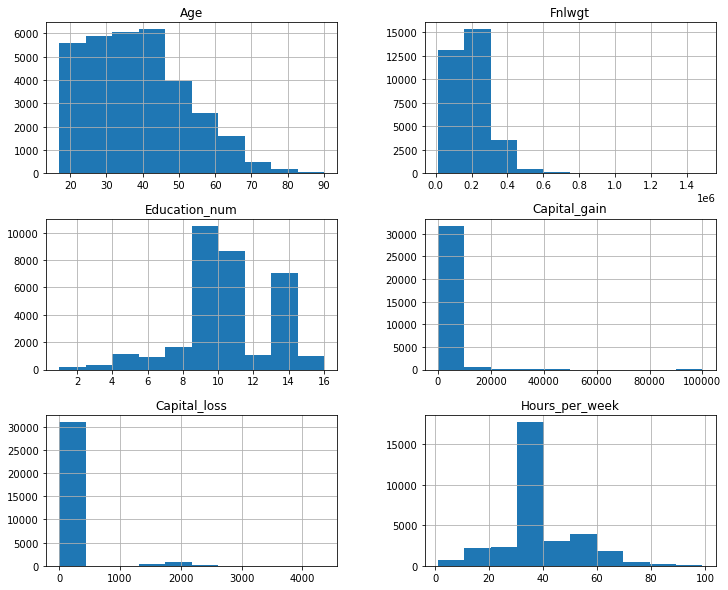

In [334]:
df.hist(figsize=(12,10))

#### Univariate Analysis

In [335]:
categorical_features=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

In [336]:
continous_features=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


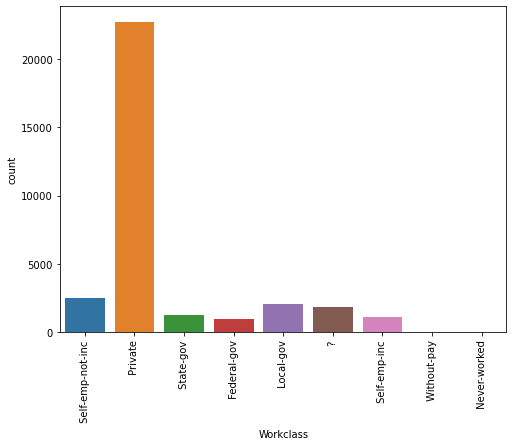

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


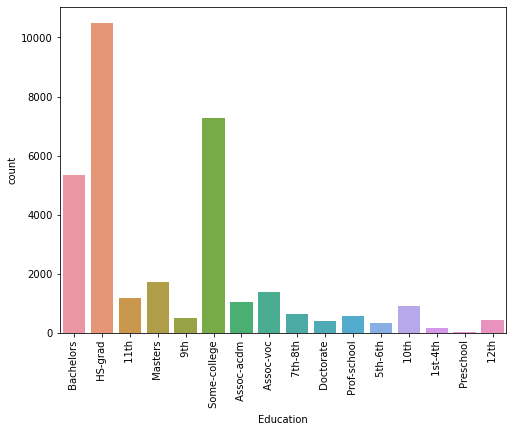

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


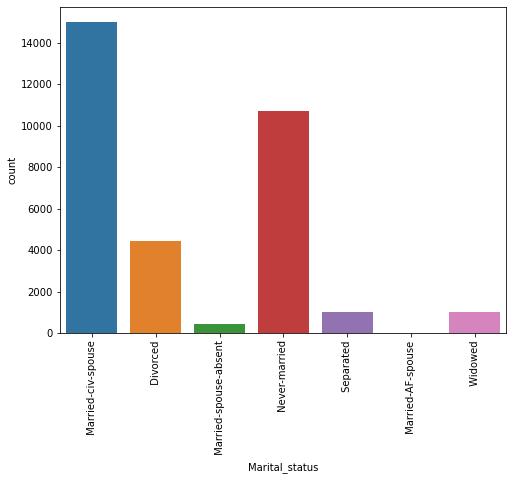

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


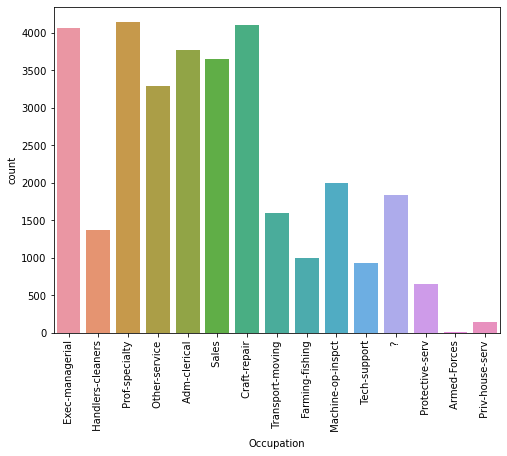

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


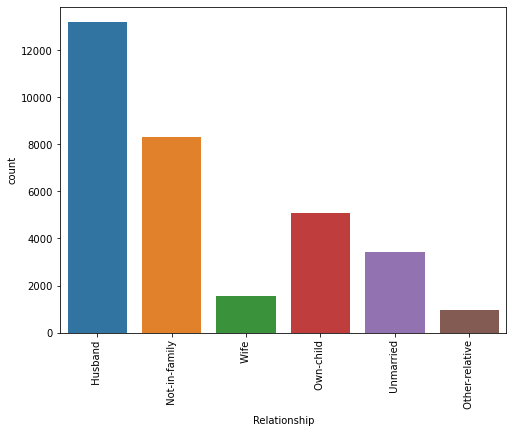

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


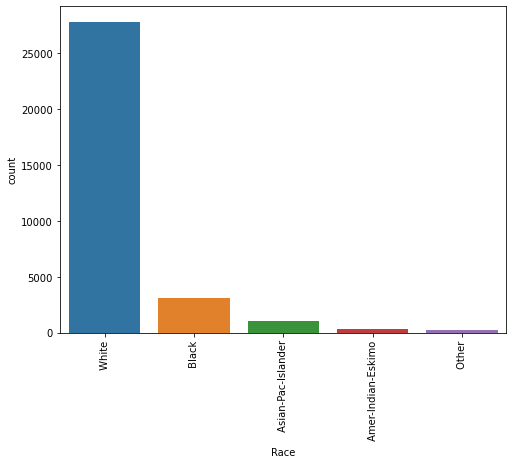

 Male      21789
 Female    10771
Name: Sex, dtype: int64


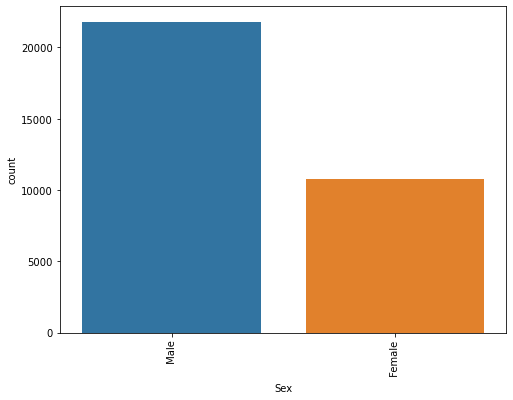

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

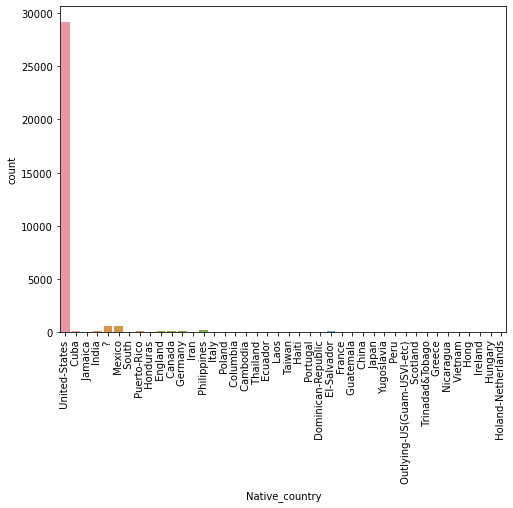

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


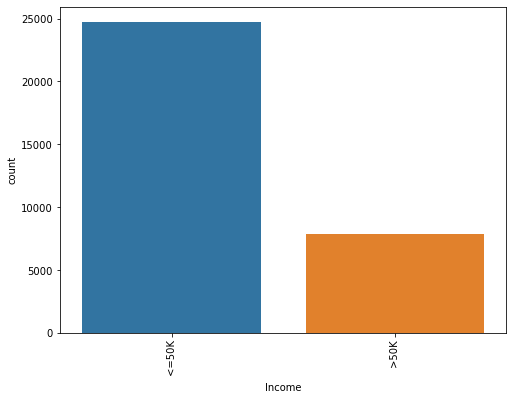

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


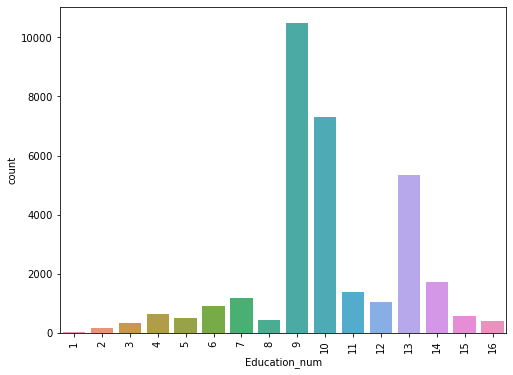

In [337]:
for col in categorical_features:
    print(df[col].value_counts())
    plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.countplot(df[col])
    plt.show()

Observations from above plots:
1. We have 8 different workclasses and people who works in Private sector is higher than other work classes.
2. We do not have/have very less record for people who never worked and without pay.
3. We have people records who studied from Preschool to Masters and Doctorate degrees.
4. We have more people who are completed their HighSchool graduates(HS grad).
5. People who studied Some College are the second highest in Education level of people.
6. We have 7 different marital status in our dataset. 
7. Most of the people are married civilian spouse and followed by never married.
8. We do not have/ have very less people who are married AF(Armed Forces) spouse.
9. In our dataset we have people who are doing different occupations and more people from occupation craft-repair and prof_speciality and followed by executive managerial.
10. We have poeple with different relationship status and relationship Husband is the highest one, It means that we have more male than female.
11. We have people from 5 different race groups and more people are from race white(A person having origins in any of the original peoples of Europe, the Middle East, or North Africa).
12. We have more male than female in our dataset.
13. We have people from 42 different coutries and majority of the people are from US and followed by Mexico.
14. People whose income is less than or equal to 50k is higher than poeple who are getting >50k.

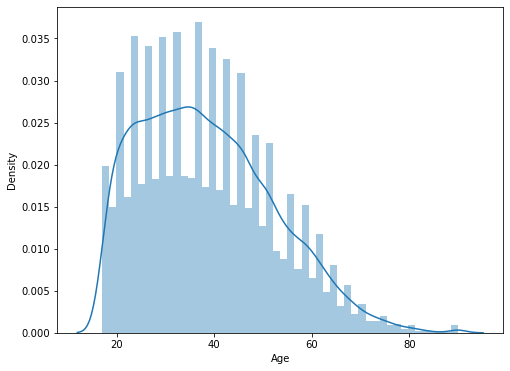

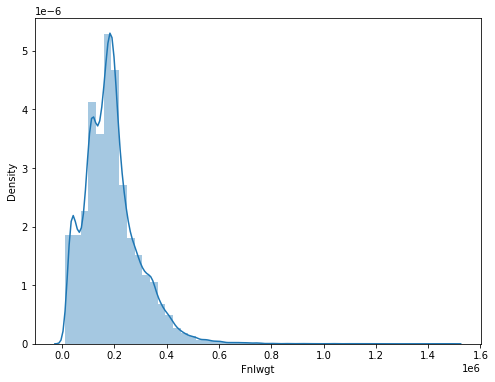

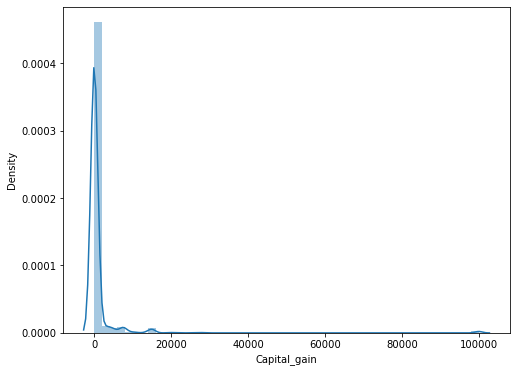

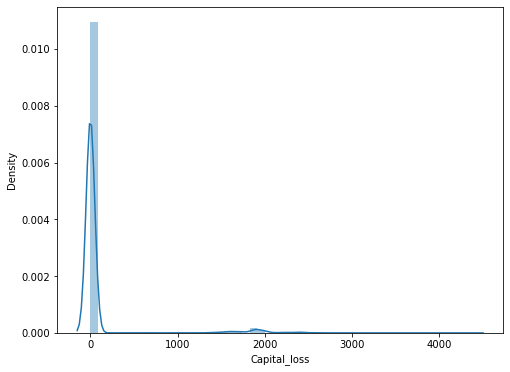

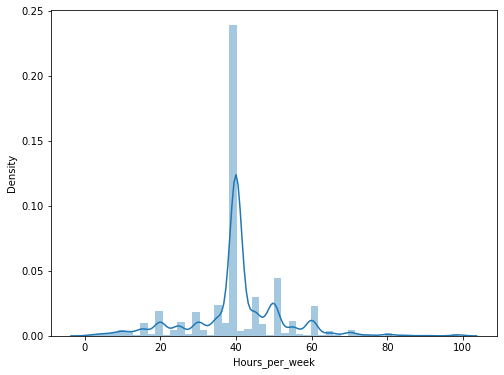

In [338]:
for col in continous_features:
    plt.figure(figsize=(8,6))
    sns.distplot(df[col])
    plt.show()

All the data are not normally distributed and we have skewness in our data.

#### Bivariate Analysis

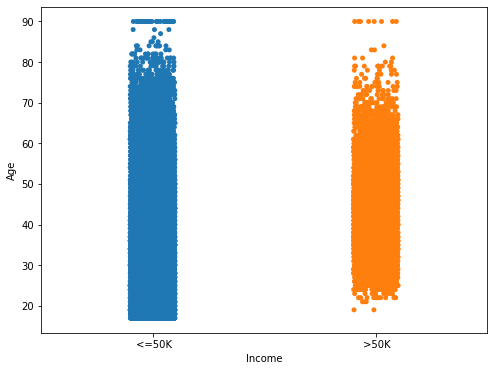

In [155]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Age',data=df)
plt.show()

From the above plot we can see that, people whose income is >50k are mostly aged between 23 to 70.

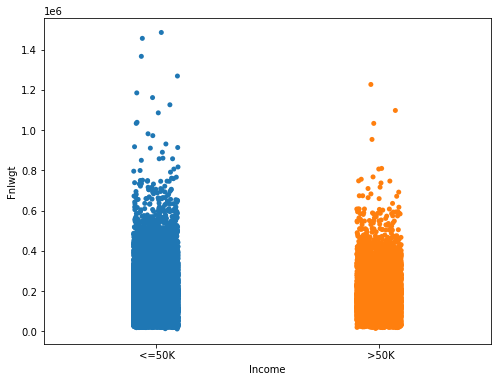

In [156]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Fnlwgt',data=df)
plt.show()

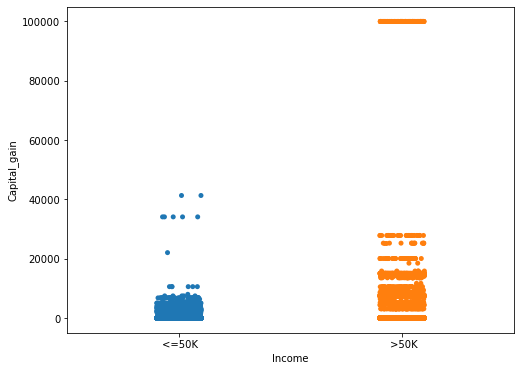

In [157]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Capital_gain',data=df)
plt.show()

From the above plot we can see that people who are getting income >50k are mostly getting higher capital income than people who earcn <50k.

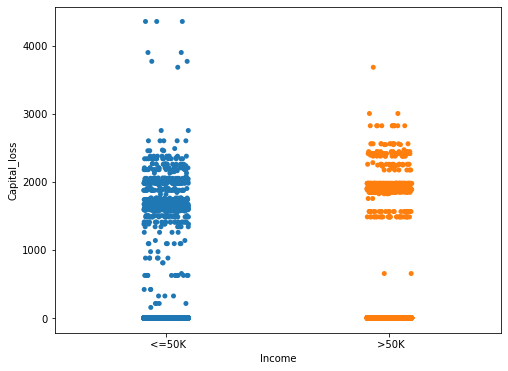

In [158]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Capital_loss',data=df)
plt.show()

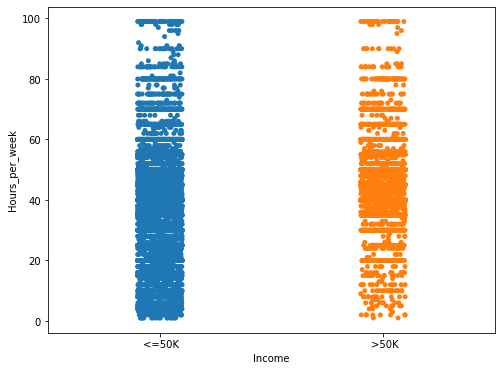

In [159]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Income',y='Hours_per_week',data=df)
plt.show()

From the above plot we can see that people who getting more than 50k income are working 35+ hours per week.

<Figure size 720x576 with 0 Axes>

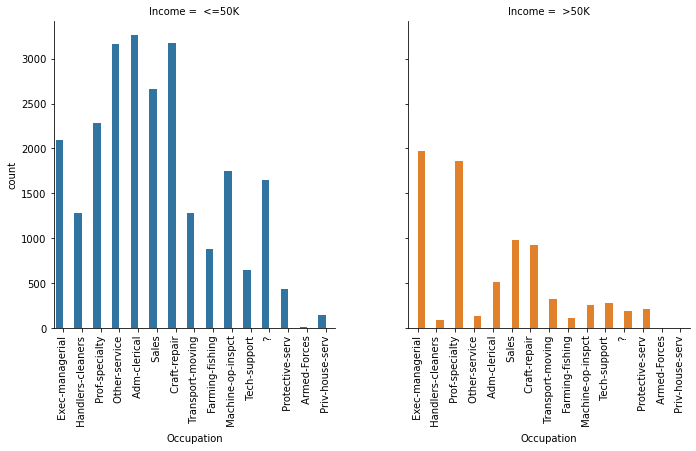

In [160]:
plt.figure(figsize=(10,8))
display=sns.catplot(x='Occupation',hue='Income',kind='count',col='Income',data=df)
display.set_xticklabels(rotation=90)

From the above plot we can observe that,
1. People who are earning >50k are mostly doing Exec-managerial as their occupation and followed by prof-speciality.
2. People who earns less than 50k are mostly doing Administrative clerical as their occupation, and followed by other service and craft-repair.

<Figure size 720x576 with 0 Axes>

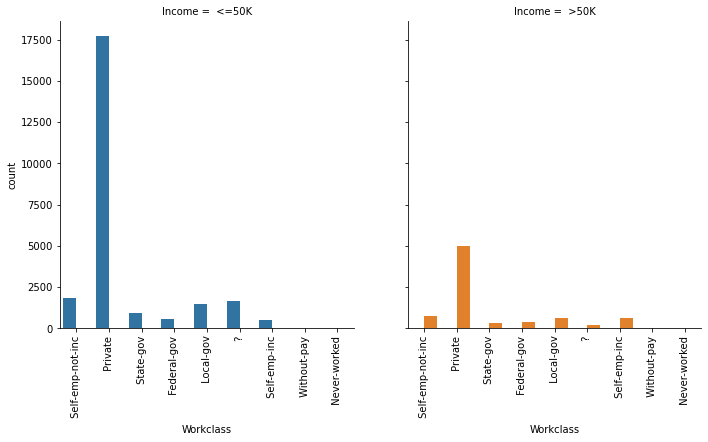

In [161]:
plt.figure(figsize=(10,8))
display=sns.catplot(x='Workclass',hue='Income',kind='count',col='Income',data=df)
display.set_xticklabels(rotation=90)

1. From the above plot we can see that private sector people earns more than other sector people. 
2. People who earns >50k also works under privte sector.

<Figure size 720x576 with 0 Axes>

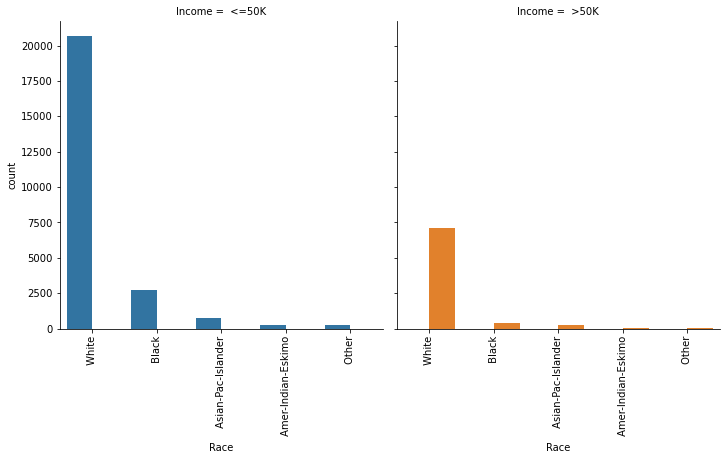

In [162]:
plt.figure(figsize=(10,8))
display=sns.catplot(x='Race',hue='Income',kind='count',col='Income',data=df)
display.set_xticklabels(rotation=90)

From the above plot we can see that people from Race group White are earning more than other group people.

<Figure size 1152x1008 with 0 Axes>

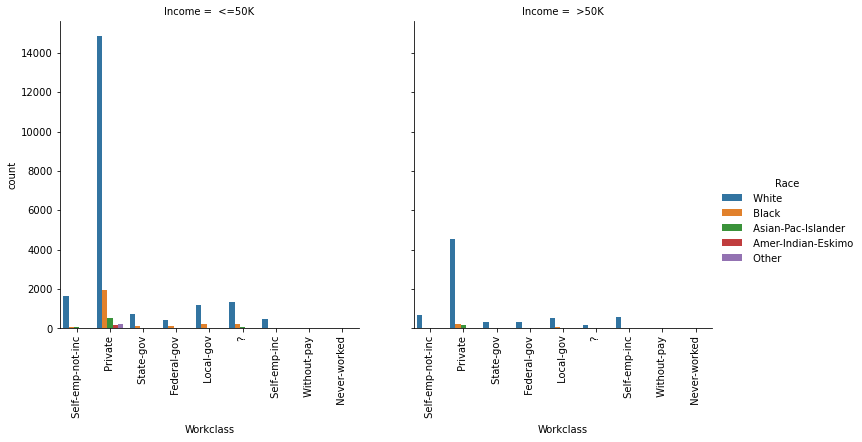

In [163]:
plt.figure(figsize=(16,14))
display=sns.catplot(x='Workclass',hue='Race',kind='count',col='Income',data=df)
display.set_xticklabels(rotation=90)

1. From the above plot we can see that most of the poeple are from white Race and they work in private sector.
2. We also have people from Black race group who are works in private sector and mostly earning <=50k.

<Figure size 1152x1008 with 0 Axes>

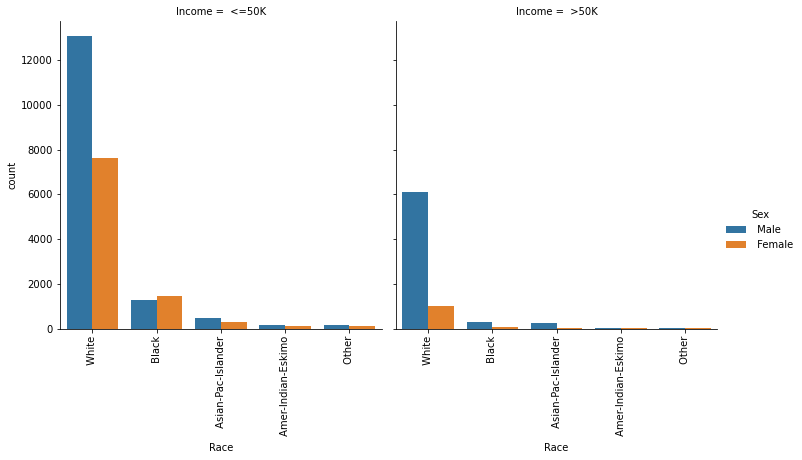

In [164]:
plt.figure(figsize=(16,14))
display=sns.catplot(x='Race',hue='Sex',kind='count',col='Income',data=df)
display.set_xticklabels(rotation=90)

From the above plot we can see that we have more female in race group black who earns <=50k

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

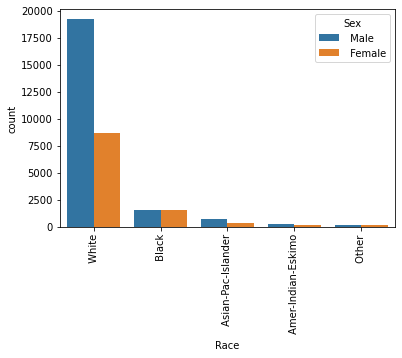

In [165]:
sns.countplot(x='Race',hue='Sex',data=df)
plt.xticks(rotation=90)

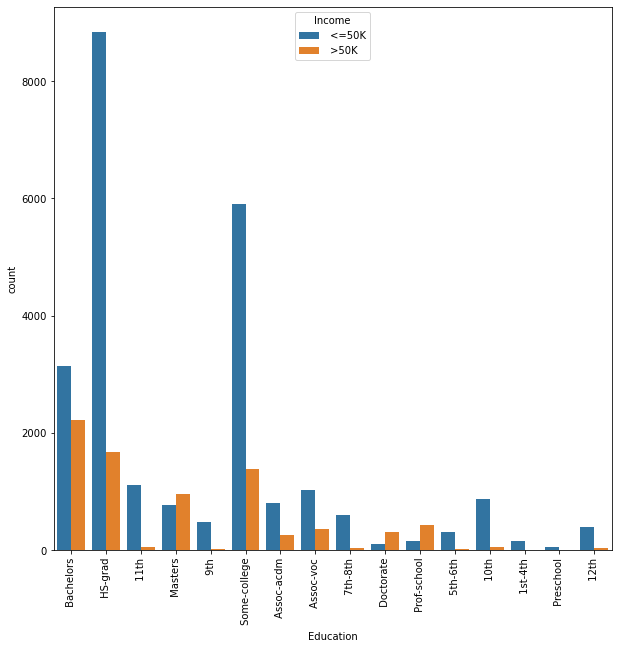

In [166]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(df["Education"],hue=df["Income"])
plt.show()

1. From the above plot we can see that people who studied Bachelors degree are earning >50K.
2. The people who earns less than 50k are mostly studied HS-grad.

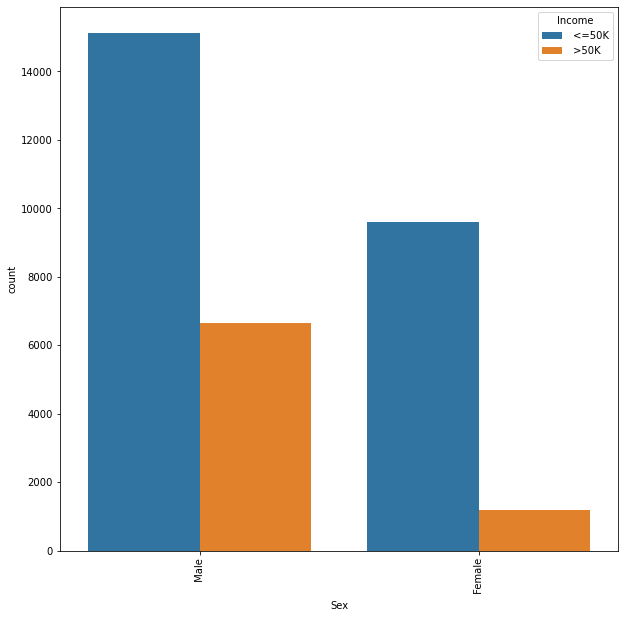

In [167]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(df["Sex"],hue=df["Income"])
plt.show()

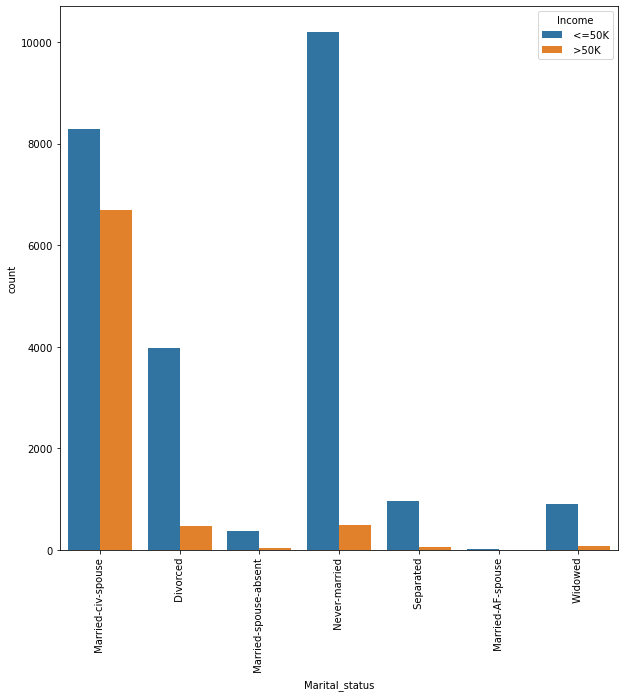

In [168]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(df["Marital_status"],hue=df["Income"])
plt.show()

1. From the above plot we can observe that people who earning >50k are married to civilian spouse.
2. People who earns less than 50k are mostly not married.

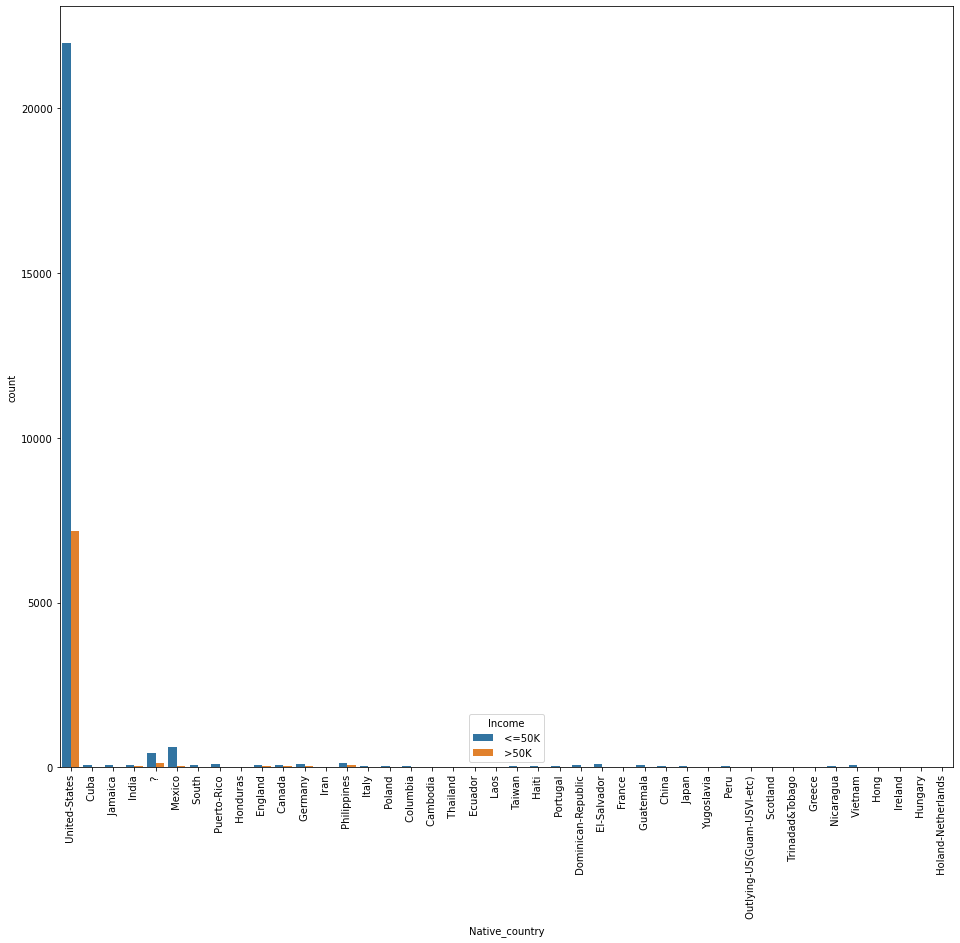

In [169]:
plt.figure(figsize=(16,14))
sns.countplot(df["Native_country"],hue=df["Income"])
plt.xticks(rotation=90)
plt.show()

We have majority of people from US and they earns >50k and <50k.

MultiVariate Analysis

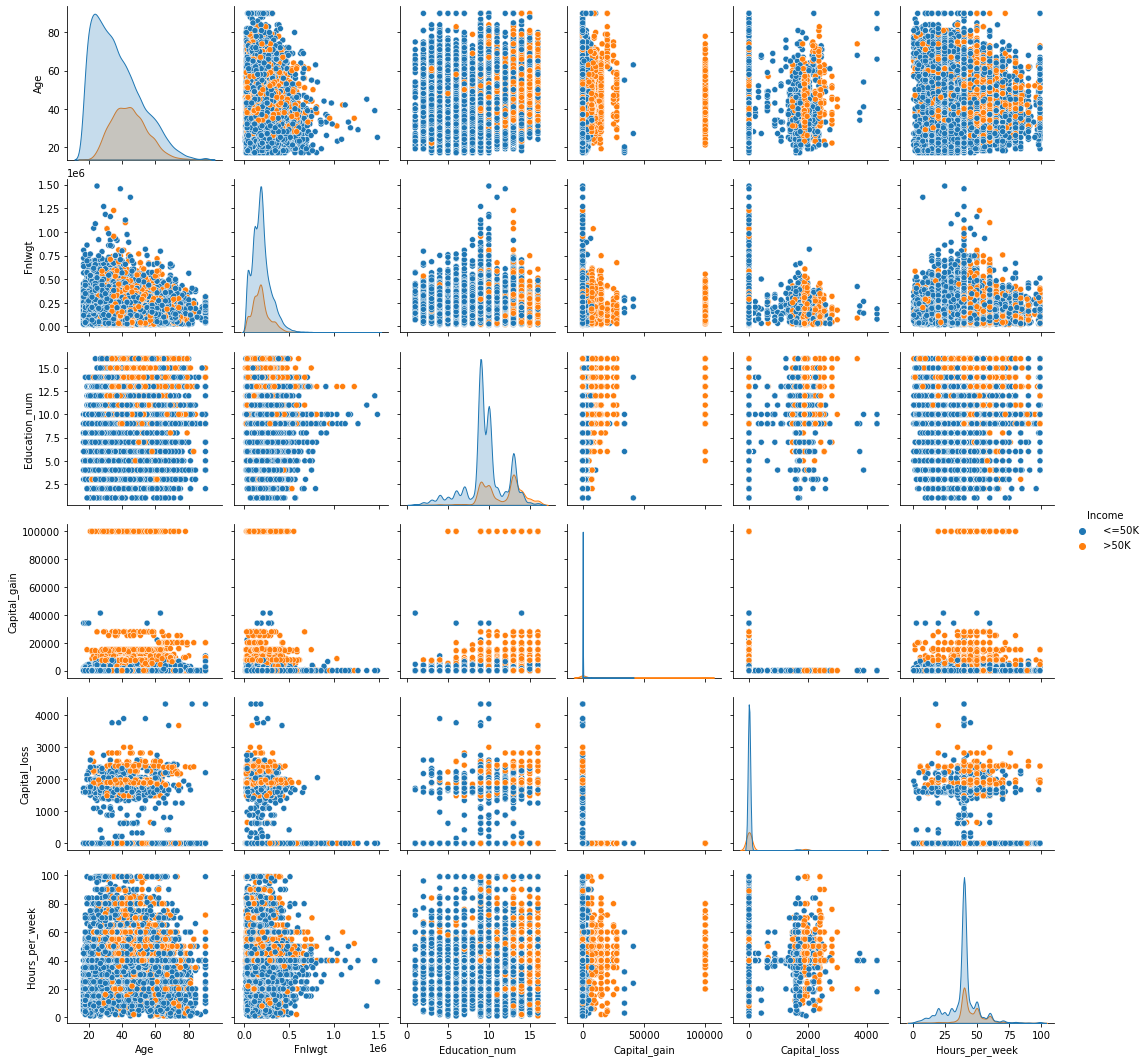

In [170]:
sns.pairplot(df,hue='Income')

#### Filling missing values

In [339]:
missing_features=['Workclass','Occupation','Native_country']
from sklearn.impute import SimpleImputer

In [340]:
for col in missing_features:
    df[col]=SimpleImputer(missing_values=' ?',strategy='most_frequent').fit_transform(df[[col]])

In [341]:
for col in missing_features:
    print(df[col].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


Encoding the object values to numbers

In [342]:
from sklearn.preprocessing import LabelEncoder

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [344]:
enc_features=['Workclass','Occupation','Native_country','Education','Marital_status','Relationship','Race','Sex','Native_country','Income']

In [345]:
for f in enc_features:
    df[f]=LabelEncoder().fit_transform(df[f])

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


### Checking Multicolinearity

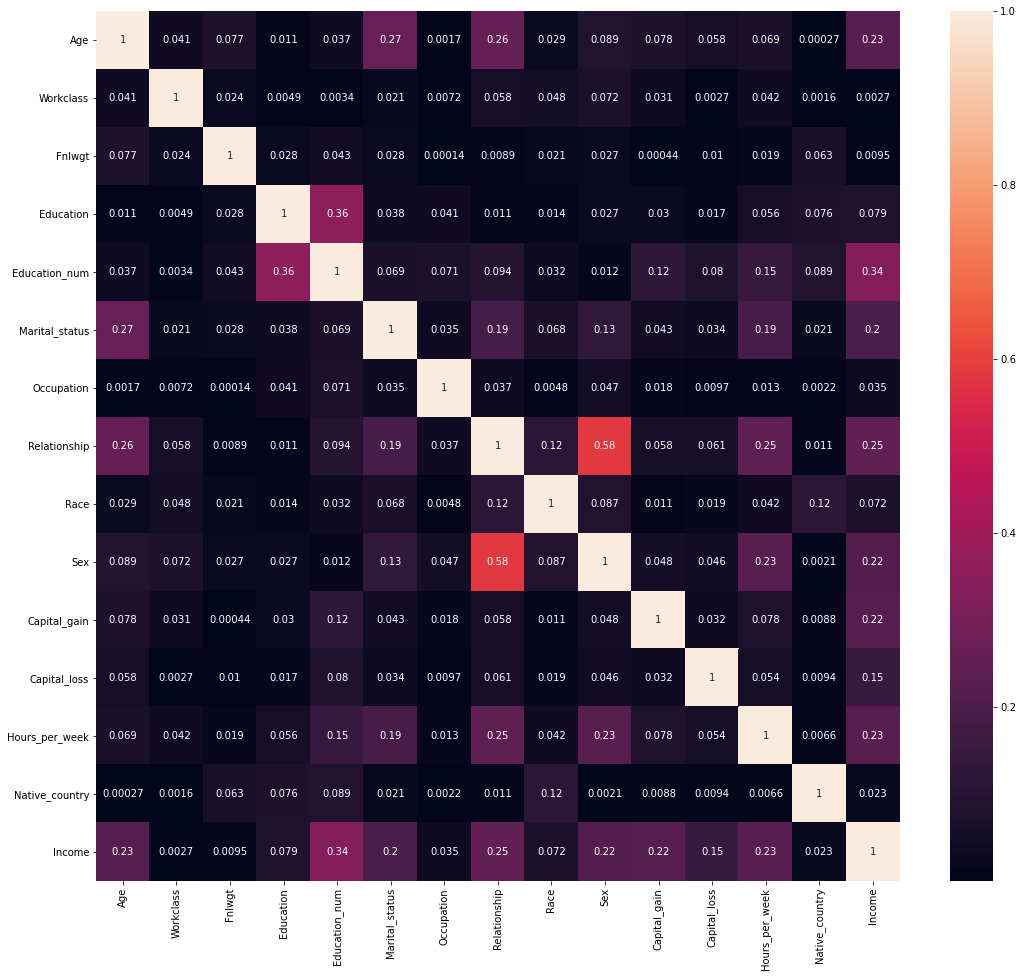

In [347]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

From the above plot we can confirm that there is no strong correlation between any of the features.

### Checking outliers

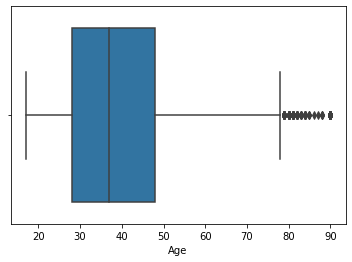

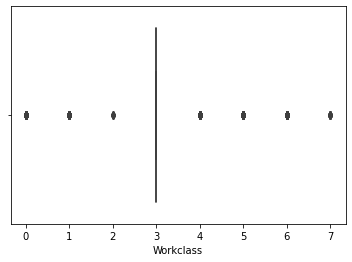

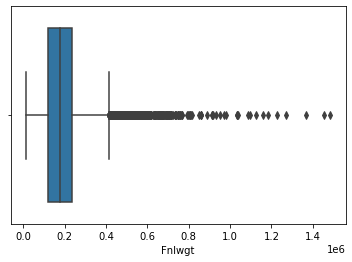

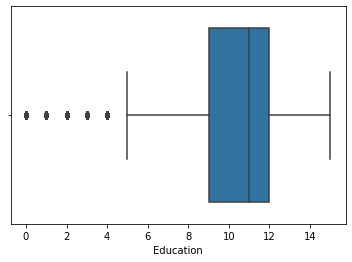

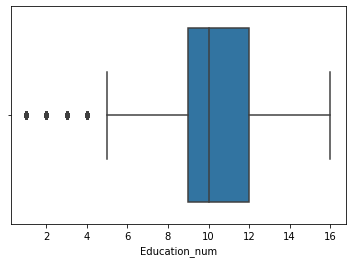

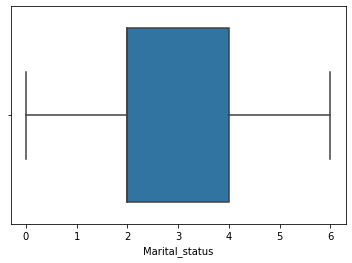

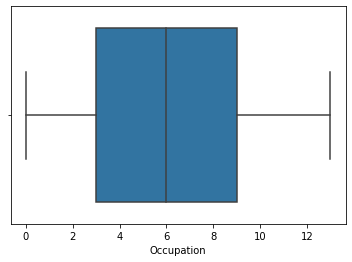

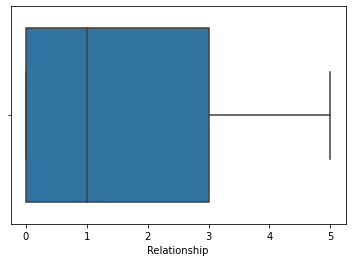

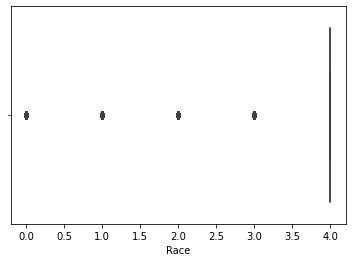

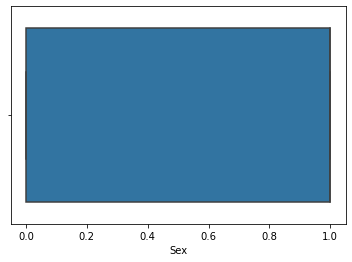

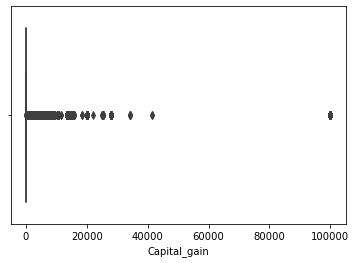

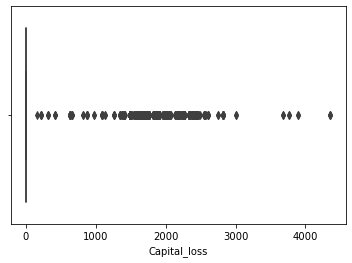

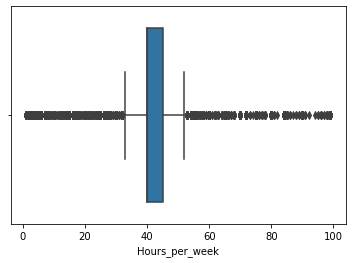

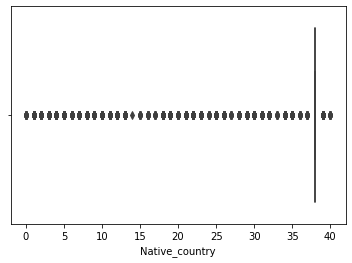

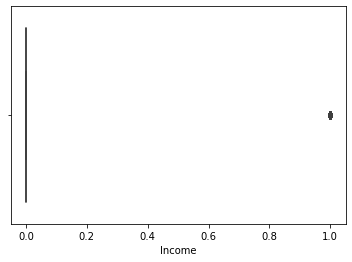

In [348]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

We have outliers in the features Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week

##### Removing outliers using Zscore

In [349]:
outlier_features=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [350]:
from scipy.stats import zscore
score=zscore(df[outlier_features])
filters=(score<3).all(axis=1)
new_df=df[filters]
print(df.shape,new_df.shape)

(32560, 15) (30106, 15)


##### Data loss

In [351]:
data_loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
data_loss

7.536855036855036

We lost 7.5% of data as part of outlier removal

#### Checking data skewness

In [352]:
new_df.skew().sort_values()

Native_country    -4.222549
Race              -2.432372
Education         -0.926898
Sex               -0.680566
Hours_per_week    -0.406818
Education_num     -0.323823
Marital_status    -0.046202
Occupation         0.002993
Workclass          0.094330
Age                0.493674
Fnlwgt             0.633927
Relationship       0.745622
Income             1.341286
Capital_gain       4.961554
Capital_loss      29.625625
dtype: float64

In [353]:
skewed_features=['Fnlwgt','Capital_gain','Capital_loss']
from sklearn.preprocessing import PowerTransformer

In [354]:
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])
new_df.skew().sort_values()

Native_country    -4.222549
Race              -2.432372
Education         -0.926898
Sex               -0.680566
Hours_per_week    -0.406818
Education_num     -0.323823
Marital_status    -0.046202
Fnlwgt            -0.034763
Occupation         0.002993
Workclass          0.094330
Age                0.493674
Relationship       0.745622
Income             1.341286
Capital_gain       3.083582
Capital_loss      24.727934
dtype: float64

In [355]:
new_df['Capital_gain']=np.log1p(new_df['Capital_gain'])

In [356]:
new_df['Capital_loss']=np.log1p(new_df['Capital_loss'])

In [357]:
new_df.skew().sort_values()

Native_country    -4.222549
Race              -2.432372
Education         -0.926898
Sex               -0.680566
Hours_per_week    -0.406818
Education_num     -0.323823
Marital_status    -0.046202
Fnlwgt            -0.034763
Occupation         0.002993
Workclass          0.094330
Age                0.493674
Relationship       0.745622
Income             1.341286
Capital_gain       3.083582
Capital_loss      24.727934
dtype: float64

We still have skewness with feature Capital_gain and Capital_loss. Lets go ahead and remove this feature, as it may affect the model accuracy.

In [358]:
new_df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

##### Lets check each feature's correlation with target variable

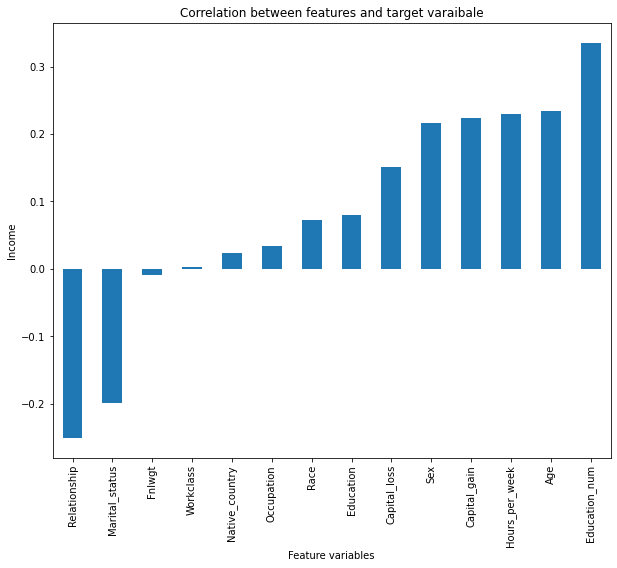

In [359]:
plt.figure(figsize=(10,8))
df.corr()['Income'].sort_values().drop(['Income']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

### Model Building

In [360]:
X=new_df.drop(['Income'],axis=1)
y=new_df['Income']

In [361]:
X.shape

(30106, 12)

In [362]:
X.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
dtype: int64

##### Lets check multicolinearity using VIF

In [363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [364]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
11,28.689504,Native_country
4,18.743653,Education_num
8,17.719659,Race
10,13.446844,Hours_per_week
3,9.121595,Education
0,8.966305,Age
1,8.430071,Workclass
9,4.350319,Sex
5,4.067373,Marital_status
6,3.359064,Occupation


In [365]:
X=X.drop(['Native_country'],axis=1)

In [366]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
4,17.873655,Education_num
8,15.584662,Race
10,12.982842,Hours_per_week
3,8.985610,Education
0,8.501042,Age
1,8.286070,Workclass
9,4.278214,Sex
5,3.930001,Marital_status
6,3.341695,Occupation
7,2.537595,Relationship


In [367]:
X=X.drop(['Education_num'],axis=1)

In [368]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
7,15.014951,Race
9,12.044789,Hours_per_week
0,8.282793,Age
1,8.228750,Workclass
3,7.288899,Education
8,4.276476,Sex
4,3.886246,Marital_status
5,3.268499,Occupation
6,2.526827,Relationship
2,1.006017,Fnlwgt


In [369]:
X=X.drop(['Race'],axis=1)

In [370]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
8,11.077245,Hours_per_week
1,7.861587,Workclass
0,7.636860,Age
3,7.001236,Education
7,4.149312,Sex
4,3.762867,Marital_status
5,3.234335,Occupation
6,2.452863,Relationship
2,1.005801,Fnlwgt


In [371]:
X=X.drop(['Hours_per_week'],axis=1)

In [372]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
1,7.472068,Workclass
0,6.744844,Age
3,6.388218,Education
7,3.741463,Sex
4,3.740752,Marital_status
5,3.207974,Occupation
6,2.416107,Relationship
2,1.005762,Fnlwgt


In [373]:
X.shape

(30106, 8)

In [374]:
y.shape

(30106,)

In [378]:
from sklearn.preprocessing import StandardScaler

In [379]:
X_sc=StandardScaler().fit_transform(X)

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve

In [381]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.7798591736415571 Best RS:  35


In [382]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=35)

#### Applying SMOTE to balance the data

In [383]:
from imblearn.over_sampling import SMOTE

In [384]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (22579, 8) (22579,)
Training set size after applying SMOTE: (35022, 8) (35022,)


In [387]:
y_train_res.value_counts()

0    17511
1    17511
Name: Income, dtype: int64

In [389]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svc=SVC()

In [394]:
models=[lr,rf_clf,knn_clf,dt_clf,gb_clf,ab_clf]

In [415]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Trian Accuracy: ",m.score(X_train_res,y_train_res))
    print("Test Accuracy: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix:\n ",confusion_matrix(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))

Metrics for  LogisticRegression()
Trian Accuracy:  0.7065273256810005
Test Accuracy:  0.6665005812987875
ROC AUC Score:  0.7113251980304003
Confusion Matrix:
  [[2943 1728]
 [ 280 1070]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75      4671
           1       0.38      0.79      0.52      1350

    accuracy                           0.67      6021
   macro avg       0.65      0.71      0.63      6021
weighted avg       0.79      0.67      0.69      6021

Metrics for  RandomForestClassifier()
Trian Accuracy:  0.9997430186739763
Test Accuracy:  0.9576482311908321
ROC AUC Score:  0.9432113037893385
Confusion Matrix:
  [[4528  143]
 [ 112 1238]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      4671
           1       0.90      0.92      0.91      1350

    accuracy                           0.96      6021
   macro avg       0.94      

In [416]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.663057329899983
For Model  RandomForestClassifier()
Mean Accuracy:  0.813691711468622
For Model  KNeighborsClassifier()
Mean Accuracy:  0.7473593005682371
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7755263364452689
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.8060852553536331
For Model  AdaBoostClassifier()
Mean Accuracy:  0.7951903034386842


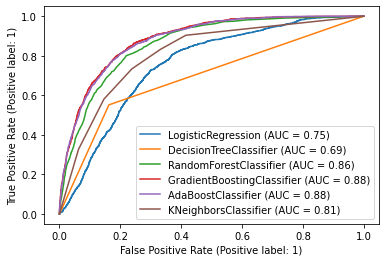

In [417]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

##### Based on cross validation score and AUC score RandomForestClassifier works well for our dataset.

### Final Model - RandomForestClassifier

#### Hyper Parameter tuning

In [418]:
from sklearn.model_selection import GridSearchCV

In [401]:
param={'criterion':['gini','entropy'],
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

RandomForestClassifier(max_features='sqrt', n_estimators=130)
0.8833333088749938


#### Finding best random state

In [419]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.9566517189835575 Best RS:  18
0.9566517189835575
0.9417790622992936
[[4525  146]
 [ 115 1235]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4671
           1       0.89      0.91      0.90      1350

    accuracy                           0.96      6021
   macro avg       0.93      0.94      0.94      6021
weighted avg       0.96      0.96      0.96      6021



In [404]:
final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=18)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.9566517189835575
ROC AUC Score:  0.9417790622992936
Confusion Matrix: 
 [[4525  146]
 [ 115 1235]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      4671
           1       0.89      0.91      0.90      1350

    accuracy                           0.96      6021
   macro avg       0.93      0.94      0.94      6021
weighted avg       0.96      0.96      0.96      6021



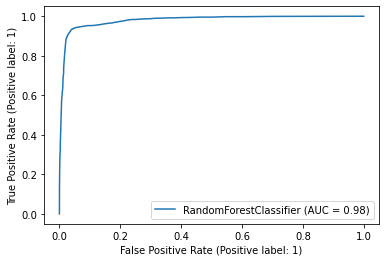

In [405]:
plot_roc_curve(final_model,X_test,y_test)
plt.show()

##### We able to build a model with  98% of AUC score and 96% of accuracy.

### Model Saving

In [411]:
import pickle

In [412]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CensusIncomePrediction.pkl','wb'))

In [413]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CensusIncomePrediction.pkl','rb'))

In [414]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0
